Read CSV + Chuyển thuộc tính bảng sang cột dọc, năm sang ngang

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("Data_coffee.csv")
df.info()
# Nếu dữ liệu đang dạng ngang (Hang_muc là dòng, năm là cột)
# Ta xoay lại cho chuẩn
if "Hang_muc" in df.columns:
    df = df.set_index("Hang_muc").T
    df = df.rename_axis("Year").reset_index()
    df["Year"] = df["Year"].astype(int)
    df = df.drop(columns=["Hang_muc"])

# Giữ lại các cột số
df_numeric = df.select_dtypes(include=['number'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hang_muc  12 non-null     object 
 1   2005      9 non-null      float64
 2   2006      9 non-null      float64
 3   2007      12 non-null     float64
 4   2008      12 non-null     float64
 5   2009      12 non-null     float64
 6   2010      12 non-null     float64
 7   2011      12 non-null     float64
 8   2012      12 non-null     float64
 9   2013      12 non-null     float64
 10  2014      12 non-null     float64
 11  2015      12 non-null     float64
 12  2016      12 non-null     float64
 13  2017      12 non-null     float64
 14  2018      12 non-null     float64
 15  2019      12 non-null     float64
 16  2020      12 non-null     float64
 17  2021      12 non-null     float64
 18  2022      12 non-null     float64
 19  2023      12 non-null     float64
 20  2024      11 non-null     float64


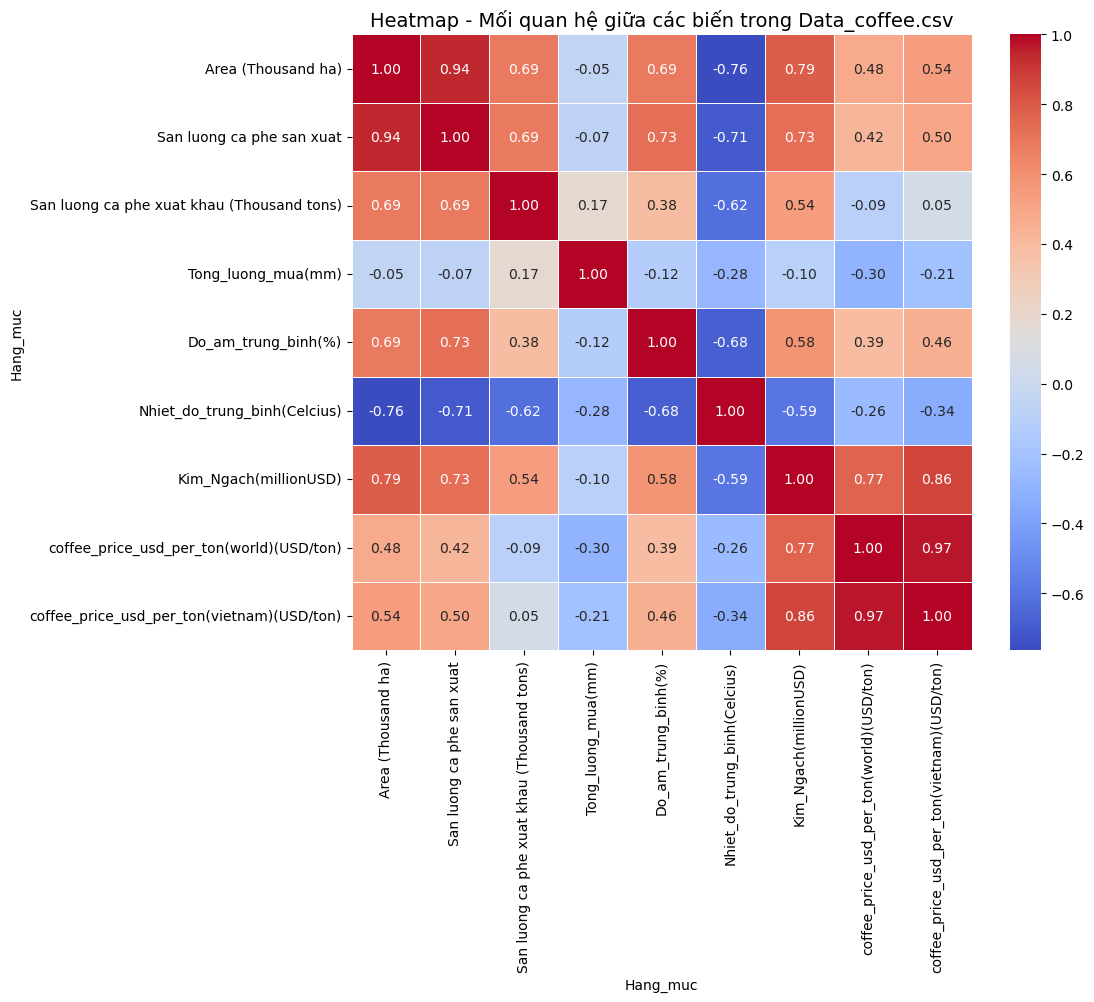

In [4]:
df_numeric = df_numeric.drop(columns=['Year'], errors='ignore')
# Tính ma trận tương quan
corr = df_numeric.corr()
corr = corr.dropna(axis=0, how='all')   # xóa hàng NaN
corr = corr.dropna(axis=1, how='all')   # xóa cột NaN
# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,         # hiển thị giá trị số
    cmap="coolwarm",    # bảng màu
    fmt=".2f",          # hiển thị 2 chữ số thập phân
    linewidths=0.5
)
plt.title("Heatmap - Mối quan hệ giữa các biến trong Data_coffee.csv", fontsize=14)
plt.show()


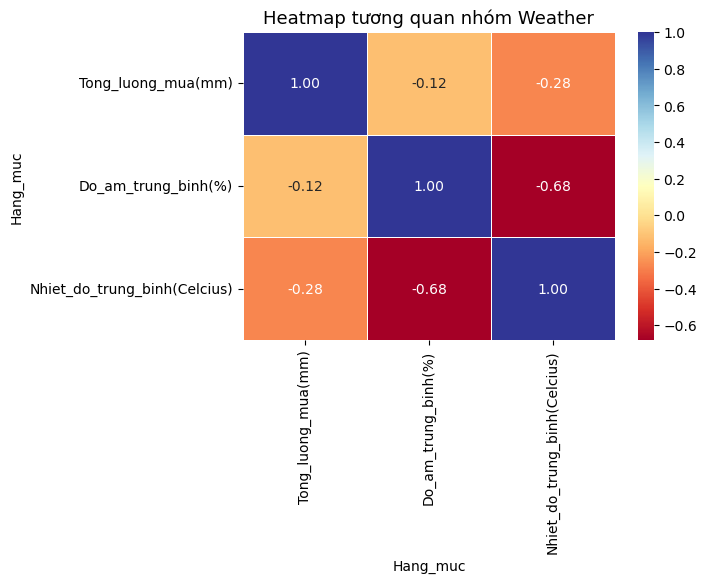

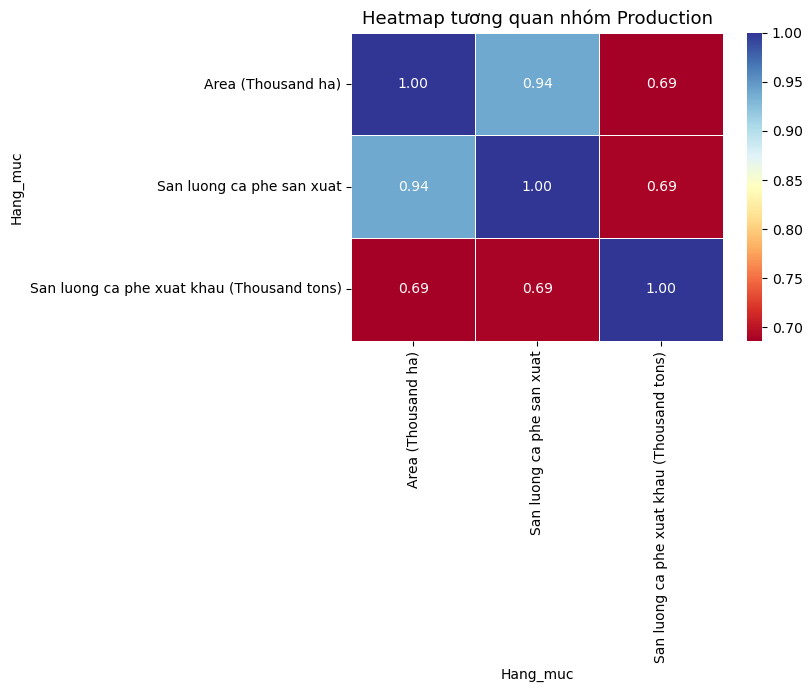

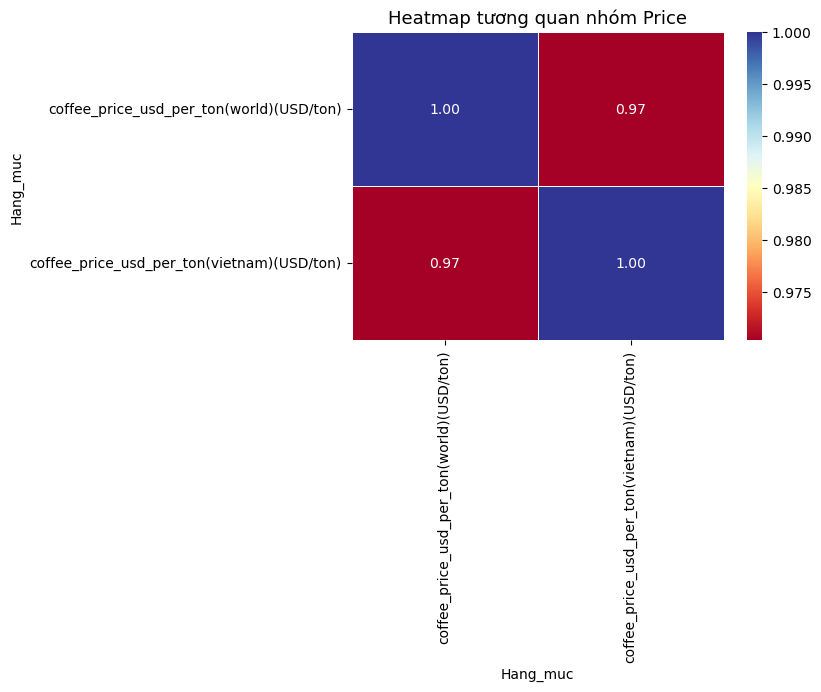

In [5]:
# === HEATMAP THEO NHÓM ===

# Chọn nhóm biến
weather_cols = ["Tong_luong_mua(mm)", "Do_am_trung_binh(%)", "Nhiet_do_trung_binh(Celcius)"]
production_cols = ["Area (Thousand ha)", "San luong ca phe san xuat", "San luong ca phe xuat khau (Thousand tons)"]
price_cols = ["coffee_price_usd_per_ton(world)(USD/ton)", "coffee_price_usd_per_ton(vietnam)(USD/ton)"]

# Gom nhóm lại để vẽ
groups = {
    "Weather": weather_cols,
    "Production": production_cols,
    "Price": price_cols
}

for group_name, cols in groups.items():
    # Lọc các cột có tồn tại trong df
    valid_cols = [c for c in cols if c in df.columns]
    if not valid_cols:
        continue

    plt.figure(figsize=(6, 4))
    sns.heatmap(
        df[valid_cols].corr(),
        annot=True,
        cmap="RdYlBu",
        fmt=".2f",
        linewidths=0.5
    )
    plt.title(f"Heatmap tương quan nhóm {group_name}", fontsize=13)
    plt.show()
